Iteration 1
Best Route: [26, 18, 3, 45, 35, 13, 40, 5, 9, 30, 10, 11, 29, 41, 2, 4, 44, 19, 14, 12, 25, 43, 38, 17, 8, 36, 16, 23, 49, 6, 27, 32, 33, 28, 15, 34, 1, 46, 37, 7, 42, 31, 22, 20, 47, 24, 0, 39, 21, 48]
Best Distance: 99.0

Iteration 2
Best Route: [26, 18, 3, 45, 35, 13, 40, 5, 9, 30, 10, 11, 29, 41, 2, 4, 44, 19, 14, 12, 25, 43, 38, 17, 8, 23, 16, 36, 49, 6, 27, 32, 33, 28, 15, 34, 1, 46, 37, 7, 42, 31, 22, 20, 47, 24, 0, 39, 21, 48]
Best Distance: 98.0

Iteration 3
Best Route: [26, 18, 3, 45, 35, 13, 40, 5, 9, 30, 10, 11, 29, 41, 2, 4, 44, 19, 14, 12, 25, 43, 38, 17, 27, 23, 16, 36, 49, 6, 8, 32, 33, 28, 15, 34, 1, 46, 37, 7, 42, 31, 22, 20, 47, 24, 0, 39, 21, 48]
Best Distance: 97.0

Iteration 4
Best Route: [26, 18, 3, 45, 35, 13, 40, 5, 9, 30, 10, 11, 29, 41, 2, 4, 44, 19, 14, 12, 25, 43, 38, 17, 27, 23, 16, 36, 49, 6, 8, 32, 33, 28, 15, 34, 1, 46, 37, 7, 42, 31, 22, 20, 47, 24, 0, 39, 21, 48]
Best Distance: 97.0

Iteration 5
Best Route: [26, 18, 3, 45, 35, 13, 40, 5, 9

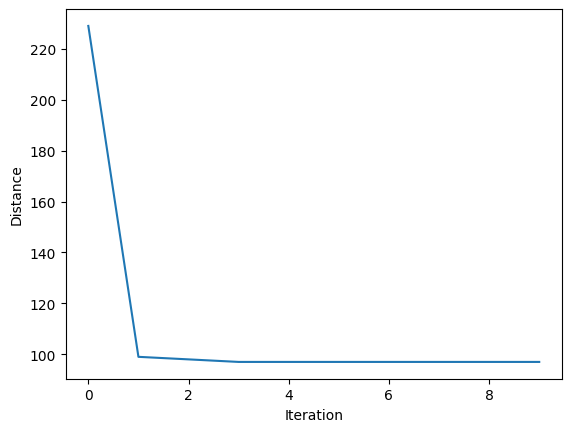

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def calculate_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        total_distance += distances[city1][city2]
    return total_distance

def steepest_hill_ascent(distances, max_iterations=10, max_no_improvement=25):
    num_cities = len(distances)
    current_route = list(range(num_cities))
    random.shuffle(current_route)
    best_route = current_route[:]
    best_distance = calculate_distance(best_route, distances)

    distances_history = [best_distance]

    no_improvement_count = 0  # Counter for consecutive iterations with no improvement

    for iteration in range(max_iterations):
        improved = False
        for i in range(num_cities - 1):
            for j in range(i + 1, num_cities):
                new_route = current_route[:]
                new_route[i], new_route[j] = new_route[j], new_route[i]
                new_distance = calculate_distance(new_route, distances)
                if new_distance < best_distance:
                    current_route = new_route[:]
                    best_distance = new_distance
                    improved = True
                    if best_distance < calculate_distance(best_route, distances):
                        best_route = current_route[:]

        if not improved:
            no_improvement_count += 1
        else:
            no_improvement_count = 0

        distances_history.append(best_distance)

        if iteration < max_iterations:
            print("Iteration", iteration + 1)
            print("Best Route:", best_route)
            print("Best Distance:", best_distance)
            print()

        if no_improvement_count >= max_no_improvement:
            print("Stopping criteria met. No improvement for", max_no_improvement, "iterations.")
            break

    return best_route, best_distance, distances_history

# Example usage:
distances_file = 'TSP_Matrix.txt'

try:
    distances = np.loadtxt(distances_file, delimiter=',')
    best_route, best_distance, distances_history = steepest_hill_ascent(distances, max_iterations=10, max_no_improvement=25)
    print("Final Best Route:", best_route)
    print("Final Best Distance:", best_distance)

    # Plot the distance history
    plt.plot(distances_history[:10])
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.show()

except ValueError as e:
    print("Error reading the distances matrix from the file:", e)
